##### Decision Tree

- 분류와 회귀에 사용되는 Supervised Learning
- 데이터 특성으로부터 추론된 결정 규칙을 통해 값을 예측함
- if-then-else 결정 규칙을 통해 데이터 학습
- 트리의 깊이가 깊을 수록 복잡한 모델임

- <span style="color:pink"> 장점 </span>
    - 이해와 해석이 쉬움
    - 시각화에 용이함
    - 수치형과 범주형 데이터 모두를 다룰 수 있다는 것이 큼

In [20]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\900767965.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer # Classification
from sklearn.datasets import load_diabetes # Regression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [3]:
# Iris Dataload

iris = load_iris()

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [5]:
# Wine Dataload

wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [6]:
# Breast Cancer Dataload

cancer = load_breast_cancer()

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

In [7]:
# Boston Dataload

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(url)

In [8]:
# Diabetes Dataload

diabetes = load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

##### Decision Tree Classifier

- DecisionTreeClassifier는 분류를 위한 결정트리 모델
- 두개의 배열 X, y 를 입력 받음
    - X 는 [n_samples, n_features] 크기의 데이터 특성 배열
    - Y 는 [n_samples]크기의 정답 배열

In [9]:
# Training iris Data (no preprocessing)

model = DecisionTreeClassifier()

cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv = 5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [10]:
# Training preprocessing iris Data 

model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [11]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

- **<span style="color:pink">Decision Tree</span>** 는 규칙을 학습하기 때문에 **<span style="color:pink">전처리에 큰 영향을 받지 않음</span>**

In [12]:
# Visualizing Decision Tree

model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

In [13]:
# Visualization(Text)

r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)

In [15]:
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

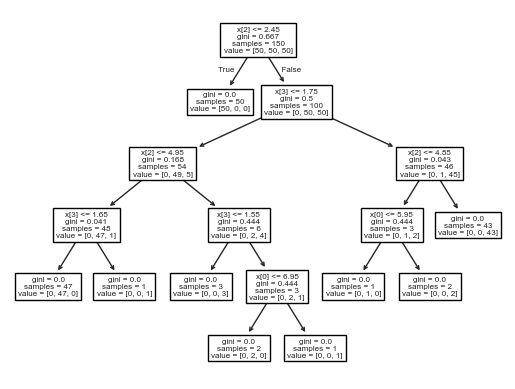

In [16]:
# # Visualization(Plot Tree)

tree.plot_tree(decision_tree=model)

In [18]:
%pip install graphviz --upgrade

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 47.1/47.1 kB 801.9 kB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Note: you may need to restart the kernel to use updated packages.


In [22]:
# Visualization

n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\2800121089.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label = iris.target_names[i],
C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\2800121089.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\2800121089.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label = iris.target_names[i],
C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\2800121089.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\2800121089.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1]

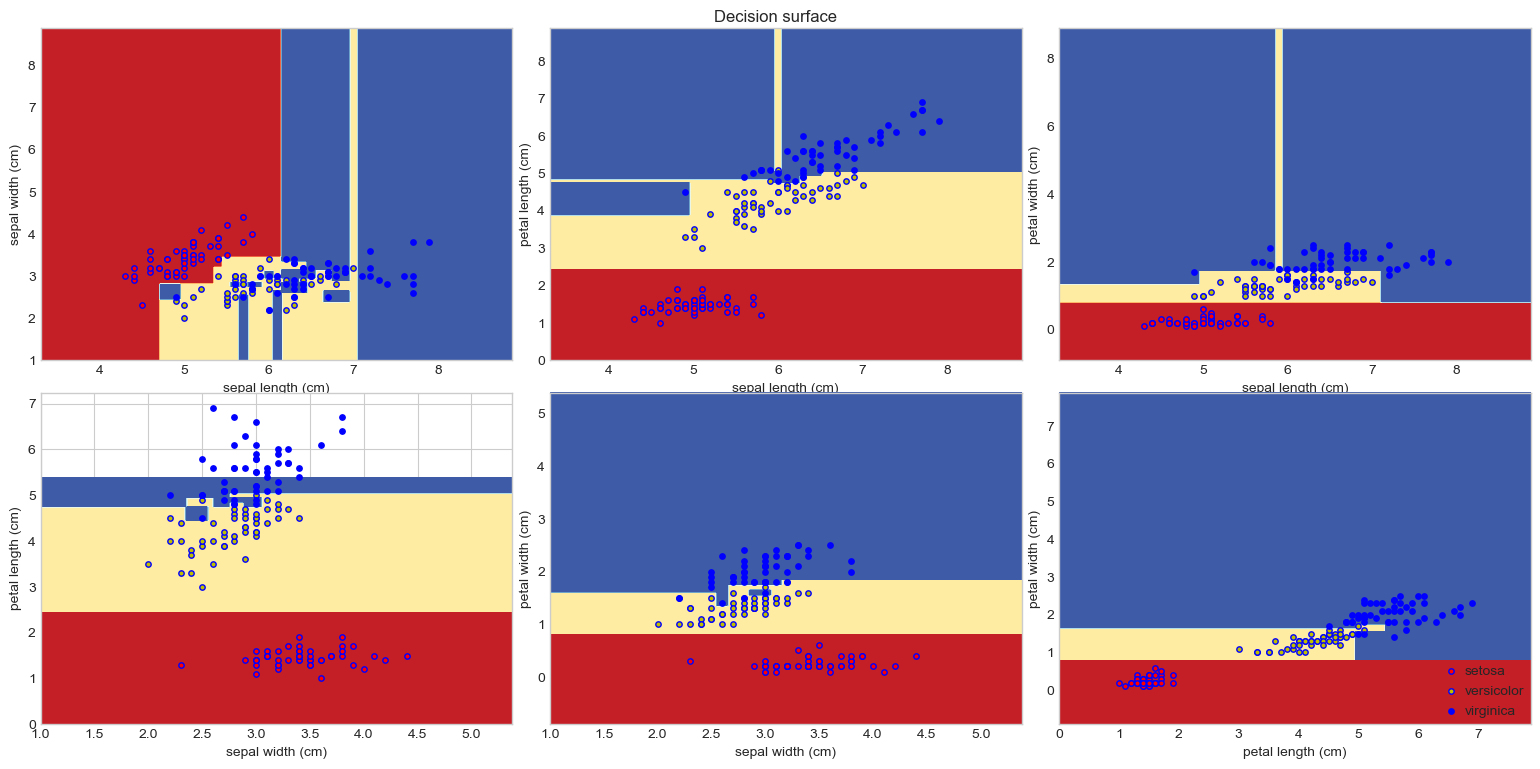

In [25]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                           [1,2], [1,3], [2,3]]):
    X = iris.data[:, pair]
    y = iris.target

    model = DecisionTreeClassifier()
    model = model.fit(X,y)

    plt.subplot(2, 3, pairidx +1)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 0].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label = iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolors='b', s=15)
        
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight');

C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\927030494.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label = iris.target_names[i],
C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\927030494.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\927030494.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label = iris.target_names[i],
C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\927030494.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
C:\Users\jjong\AppData\Local\Temp\ipykernel_15688\927030494.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=c

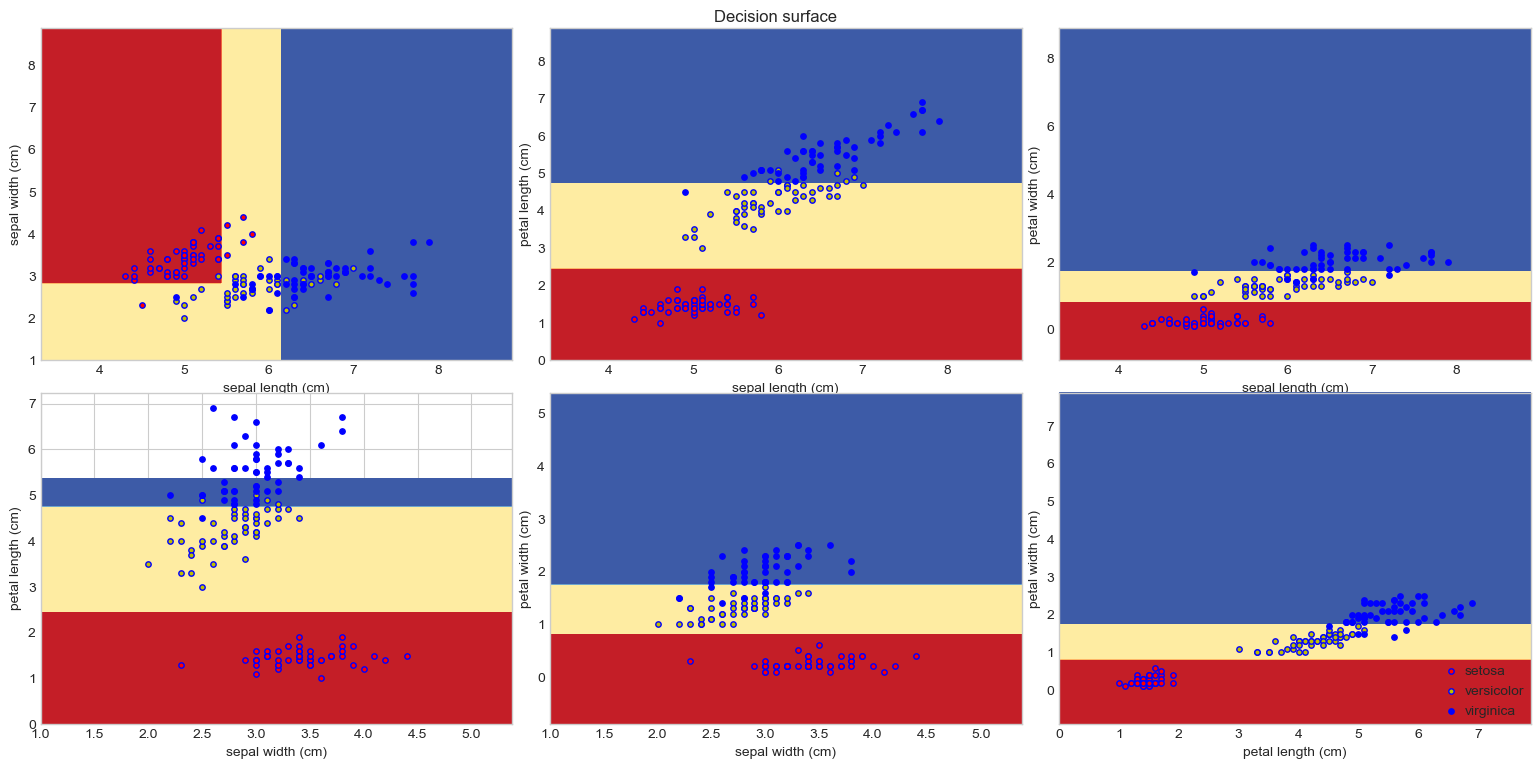

In [26]:
# max depth 설정 (line 10)

plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([[0,1], [0,2], [0,3],
                           [1,2], [1,3], [2,3]]):
    X = iris.data[:, pair]
    y = iris.target

    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X,y)

    plt.subplot(2, 3, pairidx +1)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 0].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label = iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolors='b', s=15)
        
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight');

In [27]:
# Training Wine Data (no preprocessing)

model = DecisionTreeClassifier()

In [28]:
cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.91666667, 0.83333333, 0.86111111, 0.91428571, 0.85714286])

In [29]:
# Training Wine Data (Preprocessing - standardization)

model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [30]:
cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.91666667, 0.86111111, 0.91666667, 0.91428571, 0.85714286])

In [31]:
# Visulization

model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

In [32]:
r = tree.export_text(decision_tree=model,
                     feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- ash <= 2.45
|   |   |   |   |--- class: 1
|   |   |   |--- ash >  2.45
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- magnesium <= 98.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- magnesium >  98.50
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|   |   |   |--- clas

[Text(0.5657894736842105, 0.9166666666666666, 'x[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59.0, 71.0, 48.0]'),
 Text(0.34210526315789475, 0.75, 'x[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.45394736842105265, 0.8333333333333333, 'True  '),
 Text(0.21052631578947367, 0.5833333333333334, 'x[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'x[2] <= 2.45\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'x[6] <= 0.795\n

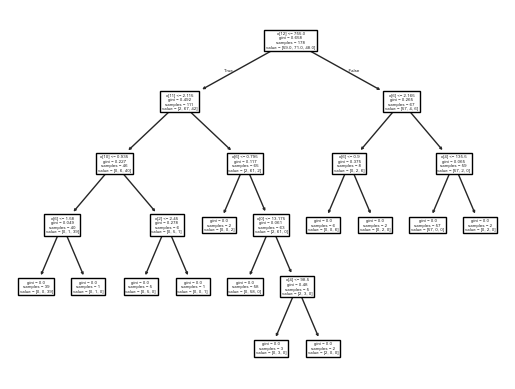

In [38]:
# plot tree
tree.plot_tree(model)